# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

- This script applies PCA to reduce the dimensions of the California Housing dataset, followed by clustering using the DBSCAN algorithm with specified parameters.
- It visualizes the clustering results and noise/outliers on a geographical map using longitude and latitude coordinates, with clusters differentiated by color. The plot includes a color bar for cluster labels and grid lines for better visualization.

# Data Loading & Preprocessing

In [2]:
path = 'C:\\Users\\zcindemir\\Desktop\\Data Mining Project\\housing.csv'
housing = pd.read_csv(path)

housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

encoder = OneHotEncoder()
ocean_proximity_encoded = encoder.fit_transform(housing[['ocean_proximity']]).toarray()
feature_names = encoder.get_feature_names_out(['ocean_proximity'])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=feature_names)
housing_encoded = pd.concat([housing.drop('ocean_proximity', axis=1), ocean_proximity_df], axis=1)

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_encoded)

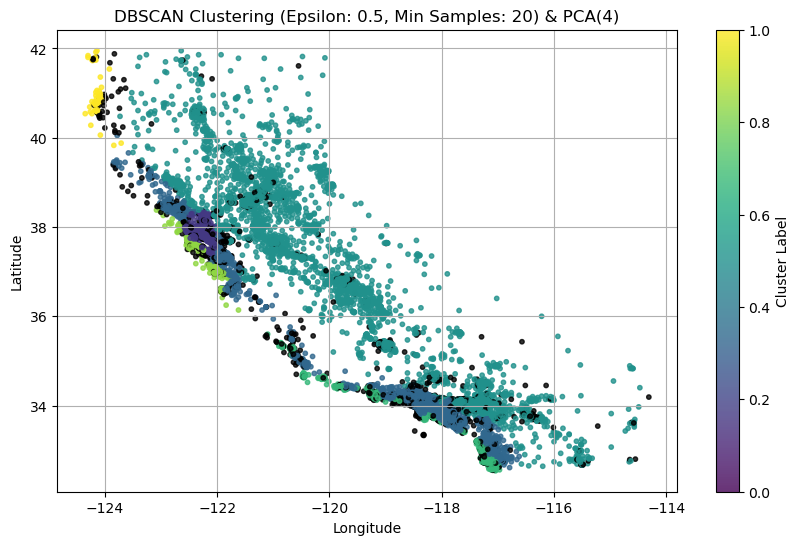

In [3]:
pca = PCA(n_components=4)
housing_pca = pca.fit_transform(housing_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=20)
labels = dbscan.fit_predict(housing_pca)

colors = np.array(['#000000' if x == -1 else plt.cm.viridis((x + 1) / (labels.max() + 1)) for x in labels], dtype=object)

plt.figure(figsize=(10, 6))

scatter = plt.scatter(housing['longitude'], housing['latitude'], c=colors, s=10, alpha=0.8)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering (Epsilon: 0.5, Min Samples: 20) & PCA(4)')
plt.grid(True)
plt.show()